In [162]:
import numpy as np

In [163]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [164]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

<h2>Preprocessing</h2>

In [165]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
display(X_train.shape)
display(X_test.shape)
display(X_train[0])

(60000, 784)

(10000, 784)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [166]:
a = np.array([[1,2,3], [3,4,5], [4,5,6]])
display(a.shape)
display(a.reshape(-1))

(3, 3)

array([1, 2, 3, 3, 4, 5, 4, 5, 6])

In [167]:
import matplotlib.pyplot as plt

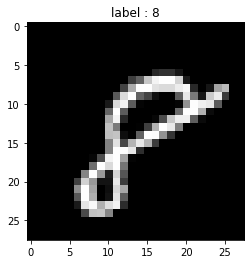

In [168]:
%matplotlib inline
index = 59999
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray', vmin=0, vmax=255)
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [169]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [170]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

print(y_train_one_hot[0:5])

(60000,)
(60000, 10)
float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000, 10)


<h2>Scratch Neural Network</h2>

In [172]:
class GetMiniBatch:
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]   

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [173]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, n_nodes1, n_nodes2, activation1='sigmoid', activation2='sigmoid', batch_size=None, n_epochs=1, lr=0.01, seed=0, verbose=False):
        self.verbose = verbose
        self.seed = seed
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.activation1 = activation1
        self.activation2 = activation2
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.lr = lr

    def _init_weight_and_bias(self):
        W = np.full(3, None)
        B = np.full(3, None)
        sigma = 0.01
        W[0] = sigma * np.random.randn(self.n_features, self.n_nodes1)
        W[1] = sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        W[2] = sigma * np.random.randn(self.n_nodes2, self.n_output)

        B[0] = sigma * np.random.randn(self.n_nodes1)
        B[1] = sigma * np.random.randn(self.n_nodes2)
        B[2] = sigma * np.random.randn(self.n_output)
        return W, B

    def _sigmoid(self, A):
        return 1 / (1 + np.exp(-A))
    
    def _hyperbolic_tangent(self, A):
        return np.tanh(A)
    
    def _softmax(self, A):
        return (np.exp(A).T / np.sum(np.exp(A), axis=1)).T
        
    def _activation_chooser(self, A, activation):
        if (activation == 'sigmoid'):
            return self._sigmoid(A)
        elif (activation == 'tanh'):
            return self._hyperbolic_tangent(A)
        elif (activation == 'softmax'):
            return self._softmax(A)
        return Exception("Please choose 1 of a following 'sigmoid', 'tanh', 'softmax'")

    def _foward_propagation(self, X, W, B):
        A = np.full(W.shape[0], None)
        Z = np.full(W.shape[0], None)
        #first layer
        A[0] = X @ W[0] + B[0]
        Z[0] = self._activation_chooser(A[0], self.activation1)
        #second layer
        A[1] = Z[0] @ W[1] + B[1]
        Z[1] = self._activation_chooser(A[1], self.activation2)
        #final layer
        A[2] = Z[1] @ W[2] + B[2]
        Z[2] = self._activation_chooser(A[2], 'softmax')
        return A, Z

    def _backward_propagation(self, X, y, A, Z, W):
        dL_dA = np.full(A.shape[0], None)
        dL_dB = np.full(A.shape[0], None)
        dL_dW = np.full(A.shape[0], None)
        dL_dZ = np.full(A.shape[0] - 1, None)
        #third layer
        dL_dA[2] = (Z[2] - y) / self.batch_size
        dL_dB[2] = np.sum(dL_dA[2], axis=0)
        dL_dW[2] = Z[1].T @ dL_dA[2]
        dL_dZ[1] = dL_dA[2] @ W[2].T
        #second layer
        dL_dA[1] = dL_dZ[1] * (1 - self._activation_chooser(A[1], self.activation2)**2)
        dL_dB[1] = np.sum(dL_dA[1], axis=0)
        dL_dW[1] = Z[0].T @ dL_dA[1]
        dL_dZ[0] = dL_dA[1] @ W[1].T
        #first layer
        dL_dA[0] = dL_dZ[0] * (1 - self._activation_chooser(A[0], self.activation1)**2)
        dL_dB[0] = np.sum(dL_dA[0], axis=0)
        dL_dW[0] = X.T @ dL_dA[0]
        return dL_dW, dL_dB

    def _compute_CEE(self, y, Z_3):
        """compute cross entropy error"""
        return -np.sum((y @ np.log(Z_3 + 1e-7).T)) / self.batch_size

    def _gradient_descent(self, X, y):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=self.seed)
        W, B = self._init_weight_and_bias()
        CEE_list = []
        i = 0
        for _ in range(0, self.n_epochs):
            for mini_X, mini_y in get_mini_batch:
                A, Z = self._foward_propagation(mini_X, W, B)
                CEE_list.append(self._compute_CEE(mini_y, Z[-1]))
                dL_dW, dL_dB = self._backward_propagation(mini_X, mini_y, A, Z, W)
                W -= self.lr * dL_dW
                B -= self.lr * dL_dB
                if (self.verbose == True):
                    i+=1
                    print("iter: {}     CEE: {}".format(i, CEE_list[-1]))
        return W, B, np.array(CEE_list)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self.n_output = y.shape[1]
        self.n_features = X.shape[1]
        if self.verbose == True:
            print("training train set...")
        self.W, self.B, self.CEE_list = self._gradient_descent(X, y)
        if (X_val is not None and y_val is not None):
            if self.verbose == True:
                print("training val set...")
            self.W_val, self.B_val, self.CEE_list_val = self._gradient_descent(X_val, y_val)

    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        _, Z = self._foward_propagation(X, self.W, self.B)
        return np.argmax(Z[-1], axis=1), Z[-1]

In [190]:
def plot_CEE(CEE_list, CEE_list_val):
    plt.plot(np.arange(0, CEE_list.shape[0]), CEE_list, label="train")
    plt.plot(np.arange(0, CEE_list_val.shape[0]), CEE_list_val, label="val")
    plt.legend()
    plt.xlabel("iter")
    plt.ylabel("CEE")
    plt.title("CEE graph")
    plt.grid()

In [185]:
def draw_fault(y_pred, y_val):
    """
    Display word classification results side by side. The display above the image is "estimated result / correct answer".
    Parameters:
    ----------
    y_pred : Estimated ndarray (n_samples,)
    y_val : Correct label of verification data (n_samples,)
    X_val : Verification data features (n_samples, n_features)
    """
    num = 36 # How many to display

    true_false = y_pred==y_val
    false_list = np.where(true_false==False)[0].astype(np.int)
    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

<h3>case 1</h3>

In [174]:
nn3 = ScratchSimpleNeuralNetrowkClassifier(
          n_nodes1=400,
          n_nodes2=200,
          activation1='tanh',
          activation2='tanh',
          batch_size=12000,
          n_epochs=100,
          lr=0.05,
          seed=69,
          verbose=False     
)

nn3.fit(X_train, y_train, X_val, y_val)

In [175]:
y_pred, y_proba = nn3.predict(X_val)

In [193]:
print("y_pred: \n{}".format(y_pred[:50]))
print("y_val: \n{}".format(np.argmax(y_val[:50], axis=1)))

y_pred: 
[5 1 0 1 6 8 3 8 9 8 1 4 7 0 1 4 4 9 1 9 2 7 8 5 3 9 2 4 1 9 2 3 7 4 6 0 7
 2 3 6 3 9 5 8 3 4 1 6 8 5]
y_val: 
[5 3 5 6 6 3 3 8 4 8 7 4 7 0 2 4 4 9 4 4 3 7 8 5 5 9 2 4 1 9 2 3 7 9 6 0 9
 2 3 6 3 9 8 8 3 4 1 6 8 5]


In [216]:
unique_elements, counts_elements = np.unique(y_pred - np.argmax(y_val, axis=1), return_counts=True)
print("number of correct cases: {}/{}".format(int(counts_elements[unique_elements == 0]), y_pred.shape[0]))

number of correct cases: 9034/12000


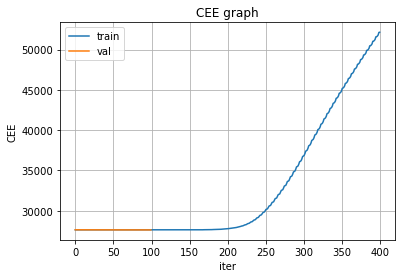

In [191]:
plot_CEE(nn3.CEE_list, nn3.CEE_list_val)

CEE going down a bit then going up

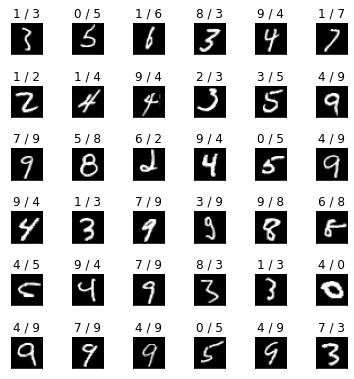

In [219]:
draw_fault(y_pred, np.argmax(y_val, axis=1))

<h3>case 2</h3>

In [202]:
nn3_2 = ScratchSimpleNeuralNetrowkClassifier(
          n_nodes1=400,
          n_nodes2=200,
          activation1='tanh',
          activation2='tanh',
          batch_size=12000,
          n_epochs=20,
          lr=0.05,
          seed=69,
          verbose=False     
)

nn3_2.fit(X_train, y_train, X_val, y_val)

In [203]:
y_pred_2, y_proba_2 = nn3_2.predict(X_val)

In [204]:
print("y_pred: \n{}".format(y_pred_2[:50]))
print("y_val: \n{}".format(np.argmax(y_val[:50], axis=1)))

y_pred: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
y_val: 
[5 3 5 6 6 3 3 8 4 8 7 4 7 0 2 4 4 9 4 4 3 7 8 5 5 9 2 4 1 9 2 3 7 9 6 0 9
 2 3 6 3 9 8 8 3 4 1 6 8 5]


In [218]:
unique_elements, counts_elements = np.unique(y_pred_2 - np.argmax(y_val, axis=1), return_counts=True)
print("number of correct cases: {}/{}".format(int(counts_elements[unique_elements == 0]), y_pred.shape[0]))

number of correct cases: 2427/12000


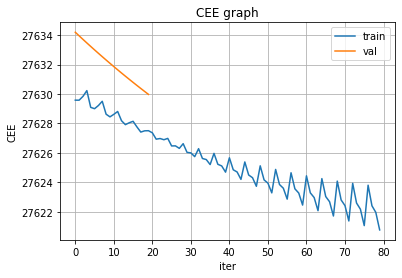

In [205]:
plot_CEE(nn3_2.CEE_list, nn3_2.CEE_list_val)

CEE going down

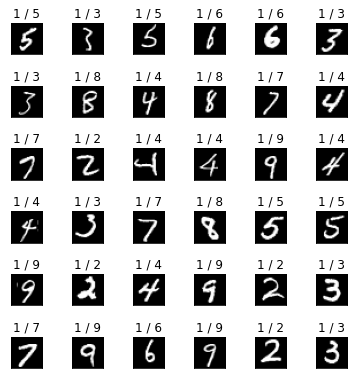

In [206]:
draw_fault(y_pred_2, np.argmax(y_val, axis=1))

<h4>It is very suprised that case 1 has higher correct cases (9034/12000) than case 2 (2427/12000) even though the CEE going up much higher than case 2.</h4>